**<font color = black size=6>实验十一：支持向量机</font>**

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix
from cvxopt import solvers

**<font color = blue size=4>第一部分:函数介绍</font>**

二次规划问题是形式如下的一类最优化问题：
$$
\begin{align}
\min_x \quad  &\frac{1}{2}x^TPx+q^Tx \\
s.t. \quad  &Gx\leq h \\
      &Ax=b
\end{align}
$$
对于这一类问题可以使用[cvxopt](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)库的solvers.qp()函数进行求解。

以下是一个例子（参考[Solving a quadratic program](https://cvxopt.org/examples/tutorial/qp.html)）:
$$
\begin{align}
\min_x \quad  &2x_1^2+x_2^2+x_1x_2+x_1+x_2 \\
s.t. \quad  &x_1\geq 0 \\
      &x_2\geq 0 \\
      &x_1+x_2=1
\end{align}
$$
为了使用solvers.qp()函数，我们需要知道在该二次规划问题中的$P,q,G,h,A,b$矩阵分别是什么。
在该优化问题中，

* $P:=\begin{bmatrix}
    4 & 1 \\ 1 & 2
   \end{bmatrix}$,
* $q:=\begin{bmatrix}
    1 \\ 1
   \end{bmatrix}$,
* $G:=\begin{bmatrix}
    -1 & 0 \\ 0 & -1
   \end{bmatrix}$,
* $h:=\begin{bmatrix}
    0 \\ 0
   \end{bmatrix}$,
* $A:=\begin{bmatrix}
    1 & 1
   \end{bmatrix}$,
* $b:=\begin{bmatrix}
    1
   \end{bmatrix}$,
   
把这些参数送入solvers.qp()函数中即可求出解。

In [182]:
# Tips1: cvxopt库中的matrix只接受double类型的数据
# Tips2: matrix使用列表作为参数创建矩阵和numpy.array使用列表作为参数创建矩阵是不同的
# print(matrix([[1.0, 1.0]]))
# print(np.array([[1.0, 1.0]]))
# print(matrix(np.array([[1.0, 1.0]])))
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0,1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]



**<font color = blue size=4>第二部分:实验任务</font>**

1.线性可分支持向量机与硬间隔最大化

<span style="color:purple">1)  
这一部分使用的数据集'dataset1.csv'是一个线性可分的数据集。每个数据样本包含两个特征$x_1$, $x_2$以及一个标签$y\in\{1,-1\}$。  
首先，请读入数据集'dataset1.csv',把数据类型都转换成np.double类型，并画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色。</span>

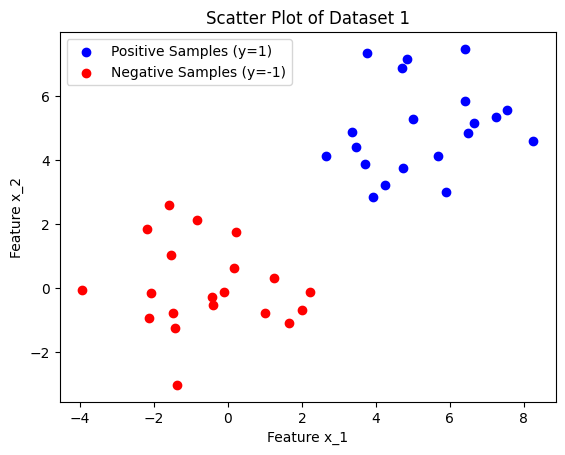

In [183]:
# ---- Your code here ----
dataset_1 = pd.read_csv("dataset1.csv").values
dataset_1 = dataset_1.astype(np.double)

# 提取特征和标签
X = dataset_1[:, :2]
y = dataset_1[:, 2]

# 分离正样本和负样本
pos = X[y == 1]
neg = X[y == -1]

# 绘制散点图
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Positive Samples (y=1)')
plt.scatter(neg[:, 0], neg[:, 1], color='red', label='Negative Samples (y=-1)')

# 添加标签和图例
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Scatter Plot of Dataset 1')
plt.legend()

# 显示图形
plt.show()

<span style="color:purple">2)  
求对偶问题的最优解$\lambda^*$  
在数据线性可分的场景中，为了找到一个能最好地划分正样本和负样本的超平面$\pmb{\omega}^T \pmb{x}+b=0$，我们需要求解下面这个主问题。
\begin{align}
\min_{\pmb{\omega},b}\quad &\frac12 ||\pmb{\omega}||^2\\
s.t.\quad &y_i(\pmb{\omega}^T \pmb{x}_i+b)\ge 1,i=1,...,m
\end{align}
</span>

<span style="color:purple">对应地，即求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\lambda \quad  &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\lambda_i\lambda_jy_iy_j\pmb{x}_i^T\pmb{x}_j-\sum_{i=1}^m\lambda_i \\
s.t. \quad  &\sum_{i=1}^m\lambda_iy_i=0 \\
      &\pmb{\lambda}\geq \pmb{0}
\end{align}
$$

这个优化问题是一个二次规划问题，可以写成如下形式：
$$
\begin{align}
\min_{\pmb{\lambda}} \quad  &\frac{1}{2}\lambda^TP\lambda+q^T\lambda \\
s.t. \quad  &G\lambda\leq h \\
      &A\lambda=b
\end{align}
$$

* $P是一个m\times m的矩阵，其中P_{ij}=y_iy_j\pmb{x}_i^T\pmb{x}_j$,
* $q是一个m\times 1的所有值都为-1的列向量，即q:=\begin{bmatrix}
    -1 & -1 & \cdots & -1
   \end{bmatrix}^T$,
* $G:=\begin{bmatrix}
    -1 & 0 & \cdots & 0 \\
    0 & -1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & -1
   \end{bmatrix}_{m\times m}=-\pmb{I},\pmb{I}为单位矩阵,$
* $h是一个m\times 1的零向量,即h:=\begin{bmatrix}
    0 & 0 & \cdots & 0
   \end{bmatrix}^T$,
* $A:=\begin{bmatrix}
    y_1 & y_2 & \cdots & y_m
   \end{bmatrix}^T$,
* $b:=\begin{bmatrix}
    0
   \end{bmatrix},一个标量$
   
把上述参数送入求解器solvers.qp()中即可得到最优解$\lambda^*$。 
 
附：$P$矩阵的一个计算方法：
设$X=\begin{bmatrix}
    x_{11} & x_{12} \\
    x_{21} & x_{22} \\
    \vdots & \vdots \\
    x_{m1} & x_{m2}
   \end{bmatrix}$,
   $Y=\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m}
   \end{bmatrix}$,
   
计算$X'=\begin{bmatrix}
    x_{11}y_1 & x_{12}y_1 \\
    x_{21}y_2 & x_{22}y_2 \\
    \vdots & \vdots \\
    x_{m1}y_m & x_{m2}y_m
   \end{bmatrix}=X*Y(注意这里是星乘)$
   
则$P=X'X'^T$。

In [184]:
# ---- Your code here ----
# 如果求解报错可以尝试在solvers.qp()中添加参数kktsolver='ldl'
# np.outer: 计算矩阵的外积, 也就是把a当做列向量, b当做行向量, 得到一个n*m的矩阵
# np.ones : 创建指定形状的数组,并将数组中的元素初始化为1
# np.eye  : 生成对角矩阵, 或将一个大小为(1,m)/(m,1)的数组,转化成one-hot数组

# 构建二次规划问题
m = len(y)

# 构建P矩阵
P = matrix(np.outer(y, y) * np.dot(X, X.T))

# 构建q向量
q = matrix(-np.ones((m, 1)))

# 构建G矩阵和h向量
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))

# 构建A矩阵和b向量
A = matrix(y.reshape(1, -1))
b = matrix(0.0)

# 使用cvxopt中的solvers.qp求解二次规划问题
sol = solvers.qp(P, q, G, h, A, b)

# 提取拉格朗日乘子
lambda_values = np.array(sol['x'])

# 打印结果
print("Optimal lambda values:")
print(lambda_values)


     pcost       dcost       gap    pres   dres
 0: -5.2553e+00 -9.0147e+00  1e+02  1e+01  2e+00
 1: -4.9265e+00 -1.9551e+00  2e+01  2e+00  3e-01
 2: -1.5759e-01 -3.1831e-01  7e-01  4e-02  7e-03
 3: -1.3147e-01 -1.9706e-01  7e-02  2e-17  8e-16
 4: -1.7378e-01 -1.8099e-01  7e-03  1e-16  9e-16
 5: -1.7979e-01 -1.8010e-01  3e-04  5e-17  1e-15
 6: -1.8003e-01 -1.8003e-01  3e-06  4e-17  7e-16
 7: -1.8003e-01 -1.8003e-01  3e-08  4e-17  8e-16
Optimal solution found.
Optimal lambda values:
[[1.61148624e-09]
 [5.12195574e-02]
 [2.56027889e-10]
 [1.02941327e-09]
 [2.49724664e-10]
 [4.42641766e-10]
 [1.15637752e-09]
 [2.18107220e-10]
 [2.61221535e-10]
 [2.91815912e-10]
 [3.86801981e-10]
 [6.07955229e-09]
 [1.36804082e-09]
 [3.58448620e-10]
 [4.20942751e-10]
 [4.85574663e-10]
 [3.68313167e-10]
 [1.28809908e-01]
 [2.97166551e-10]
 [4.49859437e-10]
 [6.51971404e-10]
 [3.53173488e-09]
 [4.80825324e-10]
 [1.57749490e-09]
 [3.51160177e-10]
 [1.80029455e-01]
 [3.06761006e-10]
 [5.06081194e-10]
 [8.12271

<span style="color:purple">3)  
求出$\pmb{\omega}^*=\sum_{i=1}^m\lambda_i^*y_i\pmb{x}_i$和$b^*=y_j-\pmb{\omega}^{*T}\pmb{x_j}$, 其中$j$为$\lambda^*$中的一个正分量$\lambda_j^*>0$的下标。  
注意：由于求解器求出来的是一个近似解，所以$\lambda^*$中很多实际上为0的分量会略大于0，这时候可以设置一个阈值把非常靠近0的那些分量筛去，再从剩下的分量中选取一个正分量来计算$b^*$,或者也可以直接取$\lambda^*$中最大的分量来计算$b^*$。</span>

In [185]:

# 设定阈值，用于筛选非常靠近0的拉格朗日乘子
threshold = 1e-5

# 找到大于阈值的拉格朗日乘子的索引
nonzero_indices = np.where(lambda_values > threshold)[0]

# 选择第一个大于阈值的索引
j = nonzero_indices[0]

# 计算omega*
omega_star = np.sum(lambda_values * y[:, np.newaxis] * X, axis=0)

# 计算b*
b_star = y[j] - np.dot(omega_star, X[j])

# 打印结果
print("Optimal omega*:", omega_star)
print("Optimal b*:", b_star)


Optimal omega*: [0.40821121 0.43979838]
Optimal b*: -1.855681884328145


<span style="color:purple">4)  
画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色，再为支持向量（训练数据中$\lambda_j^*>0$的对应的样本）标上不同的颜色，并画出决策边界$\pmb{\omega}^{*T}\pmb{x}+b=0$和间隔边界$\pmb{\omega}^{*T}\pmb{x}+b=1$与$\pmb{\omega}^{*T}\pmb{x}+b=-1$。</span>

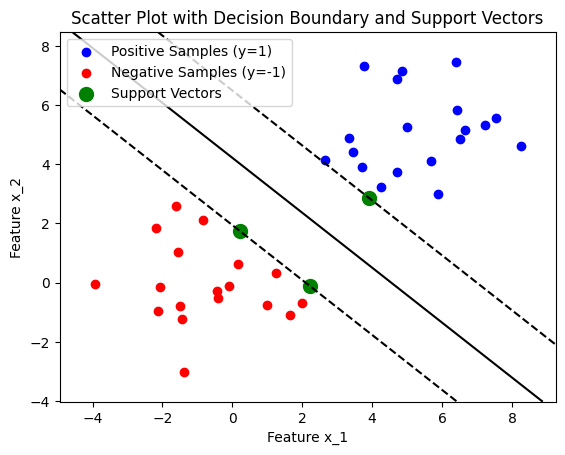

In [186]:
# 提取支持向量的索引
support_vector_indices = nonzero_indices

# 提取支持向量
support_vectors = X[support_vector_indices]

# 绘制散点图
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Positive Samples (y=1)')
plt.scatter(neg[:, 0], neg[:, 1], color='red', label='Negative Samples (y=-1)')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='o', s=100, label='Support Vectors')

# 绘制决策边界和间隔边界
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], omega_star) + b_star

Z = Z.reshape(xx1.shape)

# 绘制决策边界
plt.contour(xx1, xx2, Z, colors='black', levels=[0], linestyles=['-'])

# 绘制间隔边界
plt.contour(xx1, xx2, Z, colors='black', levels=[-1, 1], linestyles=['--', '--'])

# 添加标签和图例
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Scatter Plot with Decision Boundary and Support Vectors')
plt.legend()

# 显示图形
plt.show()


2.线性支持向量机与软间隔最大化

<span style="color:purple">1)  
这一部分使用的数据集'dataset2.csv'是一个数据近似线性可分的数据集。每个数据样本同样包含两个特征$x_1$, $x_2$以及一个标签$y\in\{1,-1\}$。   
读入数据集'dataset2.csv',把数据类型都转换成np.double类型，并画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色。</span>

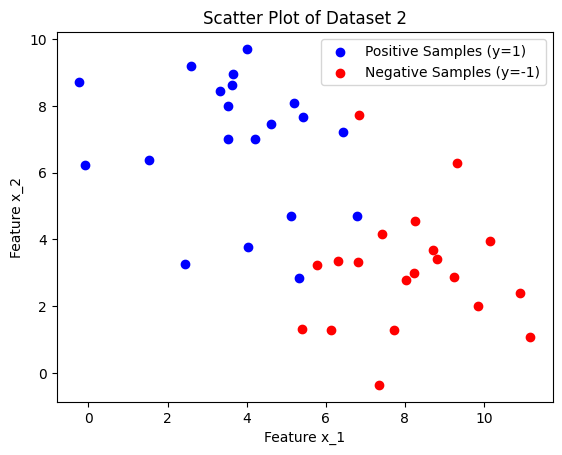

In [187]:
# ---- Your code here ----
# 读入数据集
dataset_2 = pd.read_csv("dataset2.csv").values
dataset_2 = dataset_2.astype(np.double)

# 提取特征和标签
X = dataset_2[:, :2]
y = dataset_2[:, 2]

# 分离正样本和负样本
pos = X[y == 1]
neg = X[y == -1]

# 绘制散点图
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Positive Samples (y=1)')
plt.scatter(neg[:, 0], neg[:, 1], color='red', label='Negative Samples (y=-1)')

# 添加标签和图例
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Scatter Plot of Dataset 2')
plt.legend()

# 显示图形
plt.show()


<span style="color:purple">2)  
求对偶问题的最优解$\lambda^*$  
在数据近似线性可分的场景中，为了找到一个能最好地划分正样本和负样本的超平面$\pmb{\omega}^T \pmb{x}+b=0$，我们需要求解下面这个主问题。
\begin{align}
\min_{\pmb{\omega},b,\xi_i}\quad &\frac12 ||\pmb{\omega}||^2+C\times\sum_{i=1}^m \xi_i\\
s.t.\quad &y_i(\pmb{\omega}^T \pmb{x}_i+b)\ge 1-\xi_i,i=1,...,m\\
&\xi_i\ge 0, i=1,...,m\\
\end{align}
</span>

<span style="color:purple">对应地，我们需要选择一个参数C，求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\lambda \quad  &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\lambda_i\lambda_jy_iy_j\pmb{x}_i^T\pmb{x}_j-\sum_{i=1}^m\lambda_i \\
s.t. \quad  &\sum_{i=1}^m\lambda_iy_i=0 \\
      &\pmb{0}\leq \pmb{\lambda}\leq C 
\end{align}
$$

同样地，这个问题也可以写成如下形式：  
$$
\begin{align}
\min_{\lambda} \quad  &\frac{1}{2}\lambda^TP\lambda+q^T\lambda \\
s.t. \quad  &G\lambda\leq h \\
      &A\lambda=b
\end{align}
$$


* $G:=\begin{bmatrix}
    -1 & 0 & \cdots & 0 \\
    0 & -1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & -1 \\
   1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & 1
   \end{bmatrix}_{2m\times m}=\begin{bmatrix}
    -\pmb{I} \\
    \pmb{I}
   \end{bmatrix},\pmb{I}为单位矩阵,$
* $h:=\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    0 \\
    C \\
    C \\
    \vdots \\
    C
   \end{bmatrix}_{2m\times 1}, 即一个m\times 1的零列向量与一个m\times 1的分量全为C的列向量上下拼接$,
* $P,q,A,b$与硬间隔优化问题中的矩阵相同。  
* 参数$C$请自行选择。

In [188]:
# ---- Your code here ----

# 参数C
C = 1.0

# 构建二次规划问题
m = len(y)

# 构建P矩阵
P = matrix(np.outer(y, y) * np.dot(X, X.T))

# 构建q向量
q = matrix(-np.ones((m, 1)))

# 构建G矩阵和h向量
G = matrix(np.vstack([-np.eye(m), np.eye(m)]))
h = matrix(np.vstack([np.zeros((m, 1)), C * np.ones((m, 1))]))

# 构建A矩阵和b向量
A = matrix(y.reshape(1, -1))
b = matrix(0.0)

# 使用cvxopt中的solvers.qp求解二次规划问题
sol = solvers.qp(P, q, G, h, A, b)

# 提取拉格朗日乘子
lambda_values = np.array(sol['x'])

# 打印结果
print("Optimal lambda values:")
print(lambda_values)


     pcost       dcost       gap    pres   dres
 0: -1.1816e+01 -8.2073e+01  4e+02  2e+00  3e-14
 1: -7.7195e+00 -4.7758e+01  7e+01  3e-01  3e-14
 2: -5.7411e+00 -1.4569e+01  1e+01  5e-02  2e-14
 3: -5.6219e+00 -6.8029e+00  2e+00  4e-03  3e-14
 4: -5.8632e+00 -6.2495e+00  5e-01  9e-04  2e-14
 5: -5.9709e+00 -6.0062e+00  4e-02  4e-05  2e-14
 6: -5.9845e+00 -5.9849e+00  4e-04  4e-07  2e-14
 7: -5.9847e+00 -5.9847e+00  4e-06  4e-09  2e-14
Optimal solution found.
Optimal lambda values:
[[5.88364087e-09]
 [1.14618647e-07]
 [4.36613432e-09]
 [9.99999975e-01]
 [1.03945313e-08]
 [2.88632546e-01]
 [6.63923703e-01]
 [1.19764275e-08]
 [1.53553202e-08]
 [1.22945149e-08]
 [2.00698278e-07]
 [7.88818992e-08]
 [1.53180182e-08]
 [1.89918709e-08]
 [9.57968388e-09]
 [6.24708571e-01]
 [1.86973538e-08]
 [7.89840581e-09]
 [1.15503950e-08]
 [8.98158199e-09]
 [3.73448331e-08]
 [3.08375487e-08]
 [9.99999477e-01]
 [9.99999972e-01]
 [6.33793845e-09]
 [1.73052969e-08]
 [4.43631764e-09]
 [6.40543467e-08]
 [7.61910

<span style="color:purple">3)  
求出$\pmb{\omega}^*=\sum_{i=1}^m\lambda_i^*y_i\pmb{x}_i$和$b^*=y_j-\pmb{\omega}^{*T}\pmb{x_j}$, 其中$j$为$\lambda^*$中的一个正分量$0<\lambda_j^*<C$的下标。与硬间隔优化问题同理，应该避免选择非常接近0和非常接近$C$的分量。</span>

In [189]:
# ---- Your code here ----
# 设定阈值，用于筛选非常接近0和非常接近C的拉格朗日乘子
epsilon = 1e-6

# 找到大于阈值并小于C的拉格朗日乘子的索引
valid_indices = np.where((lambda_values > epsilon) & (lambda_values < C - epsilon))[0]

# 选择第一个符合条件的索引
j = valid_indices[0]

# 计算omega*
omega_star = np.sum(lambda_values * y[:, np.newaxis] * X, axis=0)

# 计算b*
b_star = y[j] - np.dot(omega_star, X[j])

# 打印结果
print("Optimal omega*:", omega_star)
print("Optimal b*:", b_star)


Optimal omega*: [-0.96178358  0.5100769 ]
Optimal b*: 3.526495107803286


<span style="color:purple">4)  
画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色，再为支持向量（训练数据中$\lambda_j^*>0$的对应的样本）标上不同的颜色，并画出决策边界$\pmb{\omega}^{*T}\pmb{x}+b=0$和间隔边界$\pmb{\omega}^{*T}\pmb{x}+b=1$与$\pmb{\omega}^{*T}\pmb{x}+b=-1$。</span>

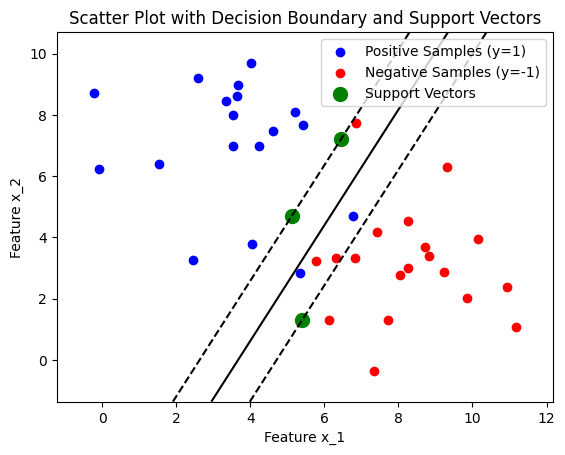

In [190]:
# ---- Your code here ----

# 提取支持向量
support_vectors = X[valid_indices]

# 绘制散点图
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Positive Samples (y=1)')
plt.scatter(neg[:, 0], neg[:, 1], color='red', label='Negative Samples (y=-1)')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='o', s=100, label='Support Vectors')

# 绘制决策边界和间隔边界
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], omega_star) + b_star

Z = Z.reshape(xx1.shape)

# 绘制决策边界
plt.contour(xx1, xx2, Z, colors='black', levels=[0], linestyles=['-'])

# 绘制间隔边界
plt.contour(xx1, xx2, Z, colors='black', levels=[-1, 1], linestyles=['--', '--'])

# 添加标签和图例
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Scatter Plot with Decision Boundary and Support Vectors')
plt.legend()

# 显示图形
plt.show()


3.非线性支持向量机与核函数

[Raisin Dataset](https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset)是一个葡萄干的数据集，总共有900个样本，每个样本包含7个(都是连续的)特征以及1个标签，每个标签只有两种可能取值。本次实验已经按照8：2的比例划分成了训练数据集'Raisin_train.csv'以及测试数据集'Raisin_test.csv'，且每个数据集都已经做了特征归一化处理以及把标签的值替换成了+1和-1。

<span style="color:purple">1) 读入训练数据集'Raisin_train.csv',把数据类型都转换成np.double类型。</span>

In [191]:
# ---- Your code here ----
from sklearn.preprocessing import StandardScaler

# 读入训练数据集
train_data = pd.read_csv("Raisin_train.csv")

# 将数据类型转换为np.double
train_data = train_data.astype(np.double)

# 获得属性与标签
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

# 打印数据集的前几行，检查是否转换成功
print(train_data.head())


       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.118564         0.098710         0.191518      0.599906    0.097970   
1  0.161723         0.140399         0.225392      0.648231    0.130325   
2  0.226950         0.250199         0.209101      0.826661    0.183372   
3  0.335562         0.185025         0.507808      0.233711    0.268302   
4  0.138333         0.139636         0.181229      0.709877    0.116301   

     Extent  Perimeter  Class  
0  0.699632   0.119551    1.0  
1  0.677817   0.147777    1.0  
2  0.764311   0.212754    1.0  
3  0.810255   0.248517    1.0  
4  0.684461   0.152644    1.0  


<span style="color:purple">2)  
求对偶问题的最优解$\lambda^*$  
在数据非线性可分的场景中，我们需要求解下面这个主问题。
\begin{align}
\min_{\pmb{\omega},b,\xi_i}\quad &\frac12 ||\pmb{\omega}||^2+C\times\sum_{i=1}^m \xi_i\\
s.t.\quad &y_i(\pmb{\omega}^T \phi(\pmb{x}_i)+b)\ge 1-\xi_i,i=1,...,m\\
&\xi_i\ge 0, i=1,...,m\\
\end{align}
</span>

<span style="color:purple">对应地，我们需要：  
选择一个核函数$K(\pmb{x},\pmb{z})$以及参数C，求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\lambda\quad   &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\lambda_i\lambda_jy_iy_jK(\pmb{x}_i,\pmb{x}_j)-\sum_{i=1}^m\lambda_i \\
s.t. \quad  &\sum_{i=1}^m\lambda_iy_i=0 \\
      &0\leq \lambda_i \leq C, i=1,...,m 
\end{align}
$$

相较于硬间隔最大化的优化问题，该优化问题仅需要对矩阵$P$做改动。
从以下常用的核函数中选择一个作为该优化问题中的$K$（其中的参数请自行进行调整）：
* 线性核：$K(\pmb{x},\pmb{z})=\pmb{x}^T\pmb{z}$
* 多项式核：$K(\pmb{x},\pmb{z})=(\pmb{x}^T\pmb{z}+1)^p$
* 高斯核：$K(\pmb{x},\pmb{z})=exp(-\frac{\parallel \pmb{x}-\pmb{z} \parallel^2}{2\sigma^2})$
* 拉普拉斯核：$K(\pmb{x},\pmb{z})=exp(-\frac{\parallel \pmb{x}-\pmb{z} \parallel}{\sigma})$
* Sigmoid核：$K(\pmb{x},\pmb{z})=tanh(\beta\pmb{x}^T\pmb{z}+\theta)$

则$P是一个m\times m的矩阵，其中P_{ij}=y_iy_jK(\pmb{x_i},\pmb{x_j})$。

In [192]:
# 高斯核函数
def gaussian_kernel(x, z, sigma=1.0):
    return np.exp(-np.linalg.norm(x - z) ** 2 / (2 * sigma ** 2))

# 拉普拉斯核函数
def laplace_kernel(x, z, sigma=1.0):
    return np.exp(-np.linalg.norm(x - z) / sigma)

# Sigmoid核函数
def sigmoid_kernel(x, z, gamma=0.1, coef0=0.0):
    return np.tanh(gamma * np.dot(x, z) + coef0)

# 构建核矩阵 P
def build_p_matrix(X, y, kernel):
    m = len(y)
    P = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            P[i, j] = y[i] * y[j] * kernel(X[i], X[j])
    return P

# 选择高斯核函数和参数
C = 1.0
sigma = 1.0
gamma = 0.1
coef0 = 0.0
m = len(y_train)
# kernel = lambda x, z: sigmoid_kernel(x, z, gamma, coef0)
kernel = lambda x, z: laplace_kernel(x, z, gamma)
# kernel = lambda x, z: gaussian_kernel(x, z, sigma)


# 构建矩阵 P
P = matrix(build_p_matrix(X_train, y_train, kernel))

# 构建 q 向量
q = matrix(-np.ones((m, 1)))

# 构建 G 矩阵和 h 向量
G = matrix(np.vstack([-np.eye(m), np.eye(m)]))
h = matrix(np.vstack([np.zeros((m, 1)), C * np.ones((m, 1))]))

# 构建 A 矩阵和 b 向量
A = matrix(y_train.reshape(1, -1))
b = matrix(0.0)

# 使用 cvxopt 中的 solvers.qp 求解二次规划问题
sol = solvers.qp(P, q, G, h, A, b)

# 提取拉格朗日乘子
lambda_values = np.array(sol['x'])

# 打印结果
print("Optimal lambda values:")
print(lambda_values)


     pcost       dcost       gap    pres   dres
 0: -1.9266e+02 -1.4852e+03  6e+03  2e+00  1e-15
 1: -1.4683e+02 -8.7819e+02  8e+02  5e-02  9e-16
 2: -1.7001e+02 -2.9282e+02  1e+02  8e-03  8e-16
 3: -1.8369e+02 -2.1119e+02  3e+01  1e-03  7e-16
 4: -1.8743e+02 -1.9421e+02  7e+00  5e-15  7e-16
 5: -1.8834e+02 -1.8977e+02  1e+00  3e-15  7e-16
 6: -1.8858e+02 -1.8879e+02  2e-01  2e-15  7e-16
 7: -1.8862e+02 -1.8865e+02  3e-02  4e-15  6e-16
 8: -1.8863e+02 -1.8863e+02  4e-03  8e-15  7e-16
 9: -1.8863e+02 -1.8863e+02  2e-04  2e-15  7e-16
Optimal solution found.
Optimal lambda values:
[[7.42251920e-04]
 [1.20345596e-06]
 [9.99999787e-01]
 [9.99999279e-01]
 [2.26071475e-05]
 [2.09688209e-01]
 [9.99999933e-01]
 [1.40109017e-01]
 [1.00900026e-02]
 [5.62506184e-02]
 [2.26185038e-01]
 [5.51113508e-01]
 [4.23750731e-02]
 [3.32698023e-05]
 [1.06002165e-05]
 [4.17660080e-01]
 [4.59529866e-01]
 [8.87869773e-02]
 [1.54158111e-01]
 [4.81891117e-01]
 [1.02833262e-01]
 [8.85052114e-04]
 [9.99999336e-01]
 

<span style="color:purple">3)  
求出$b^*=y_j-\sum_{i=1}^m \lambda_i^*y_iK(\pmb{x_i},\pmb{x_j})$, 其中$j$为$\lambda^*$中的一个正分量$0<\lambda_j^*<C$的下标。</span>

In [193]:
# ---- Your code here ----

# 设定阈值，用于筛选非常接近0和非常接近C的拉格朗日乘子
epsilon = 1e-6

# 找到大于阈值并小于C的拉格朗日乘子的索引
valid_indices = np.where((lambda_values > epsilon) & (lambda_values < C - epsilon))[0]

# 选择第一个符合条件的索引
j = valid_indices[0]

# 计算b*
b_star = y_train[j] - np.sum([lambda_values[i] * y_train[i] * kernel(X_train[j, :], X_train[i, :]) for i in range(m)])

# 打印结果
print("Optimal b*:", b_star)


Optimal b*: -0.2538257230258978


<span style="color:purple">4) 读入测试数据集'Raisin_test.csv',用分类决策函数$f(\pmb{x})=sign(\sum_{i=1}^m \lambda_i^*y_iK(\pmb{x}_i,\pmb{x})+b^*)$（注意这里的$m,\lambda_i^*,y_i,\pmb{x}_i$是训练集的, $\pmb{x}$是测试集的）进行预测，输出预测准确率。</span>

In [194]:
# 预测函数
def predict(X_test, lambda_star, b_star, X_train, y_train, kernel):
    m, n = X_train.shape
    predictions = np.zeros(X_test.shape[0])
    
    for i in range(X_test.shape[0]):
        sum = 0
        for j in range(m):
            sum += lambda_star[j] * y_train[j] * kernel(X_train[j], X_test[i])
        predictions[i] = np.sign(sum + b_star)
    
    return predictions

# 读入测试数据集
test_data = pd.read_csv("Raisin_test.csv").astype(np.double)

# 提取测试集特征和标签
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# 进行预测
predictions = predict(X_test, lambda_values, b_star, X_train, y_train, kernel)

# 计算预测准确率
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7944444444444444


**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、实验报告下周五实验课(12月1号 14:20)上课前提交报告  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验十一(支持向量机)的实验报告上交地址:https://send2me.cn/TRRgKD4K/RX29mant_U152w

三、课堂课件获取地址:https://www.jianguoyun.com/p/DZKTh-IQp5WhChiIn6gFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/DWOjj7kQp5WhChi0nqkFIAA